# Allgemein
Hier werden verschiedene Möglichkeiten der Datendarstellung untersucht. Dabei   
werden für die Darstellung als Bibliothek Seaborn und Matplotlib verwendet.

In [36]:
import pandas
import seaborn as sns
import os

In [37]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("alleFeatures.csv")
featuresDf.describe()

,Zeitstempel,Breitengrad,Laengengrad,Geschwindigkeit,MittelWX,VarianzX,StandardAX,MittelWY,VarianzY,StandardAY,...,MittelWPitch,VarianzPitch,StandardAPitch,MittelWRoll,VarianzRoll,StandardRoll,StartBewegungsD,StartBelichtung,Belichtungszeit,StoppBewegungsD
count,5.374000e+03,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,...,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5.374000e+03,5.374000e+03,5.374000e+03,5.374000e+03
mean,1.519222e+12,53.613946,10.161071,15.344702,-0.546871,38.949616,2.659251,0.407541,21.348658,2.229567,...,-0.019209,0.012089,0.037664,-0.053249,0.026076,0.030620,2.954125e+13,2.954132e+13,1.320892e+07,2.954075e+13
std,4.787940e+05,0.001040,0.013956,5.330909,5.904707,95.472608,5.646810,4.983187,49.756362,4.047569,...,0.356933,0.060331,0.102849,0.475262,0.350197,0.158223,4.787830e+11,4.787951e+11,5.567292e+06,4.787748e+11
min,1.519222e+12,53.610455,10.137818,0.000000,-23.218000,0.000000,0.000000,-31.113000,0.000000,0.000000,...,-1.476000,0.000000,0.000000,-3.199000,0.000000,0.000000,2.869522e+13,2.869515e+13,7.106086e+06,2.869527e+13
25%,1.519222e+12,53.613586,10.150167,12.708000,-1.853250,0.000000,0.000000,-1.358500,0.000000,0.000000,...,-0.114000,0.000000,0.000000,-0.098000,0.000000,0.000000,2.912483e+13,2.912476e+13,1.000184e+07,2.912476e+13
50%,1.519222e+12,53.613888,10.159737,16.164000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.954417e+13,2.954425e+13,1.000184e+07,2.954417e+13
75%,1.519223e+12,53.614555,10.173259,19.331999,0.748000,1.216750,1.103250,2.849500,9.134500,3.022750,...,0.111000,0.000000,0.000000,0.015000,0.000000,0.000000,2.995052e+13,2.995047e+13,2.000368e+07,2.995052e+13
max,1.519223e+12,53.615856,10.185248,26.280000,28.524000,554.584000,23.550000,36.337000,442.166000,21.028000,...,1.579000,1.254000,1.120000,3.065000,9.121000,3.021000,3.036319e+13,3.036313e+13,3.287369e+07,3.036319e+13


In [44]:
# Gibt die Spaltennamen aus
featuresDf.columns

Index(['Zeitstempel', 'Breitengrad', 'Laengengrad', 'Geschwindigkeit',
       'MittelWX', 'VarianzX', 'StandardAX', 'MittelWY', 'VarianzY',
       'StandardAY', 'MittelWZ', 'VarianzZ', 'StandardAZ', 'Azimuth',
       'MittelWPitch', 'VarianzPitch', 'StandardAPitch', 'MittelWRoll',
       'VarianzRoll', 'StandardRoll', 'StartBewegungsD', 'StartBelichtung',
       'Belichtungszeit', 'StoppBewegungsD'],
      dtype='object')

Mit der Seaborn Funktion pairplot können Variablen gegenübergestellt werden. Dieses ist interessant,um einen      
ersten Überblick zu bekommen. In jeder Reihe des Gitter-Plots wird eine Variable geplottet und mit    
den anderen Variablen in dem Spalten des Rasters gegenübergestellt.    
Dabei werden die Diagonalen Achsen als Blockdiagramm dargestellt, welche das Verteilungsverhältnis der    
einzelnen Variablen zeigt.  

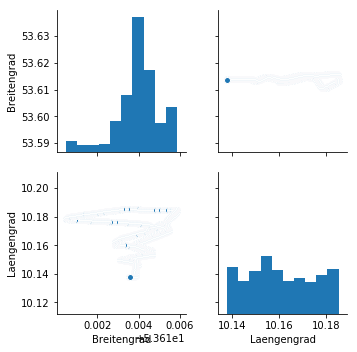

In [38]:
# Gegenüberstellung von Breiten und Längengrad
sns.pairplot(featuresDf[['Breitengrad','Laengengrad']])

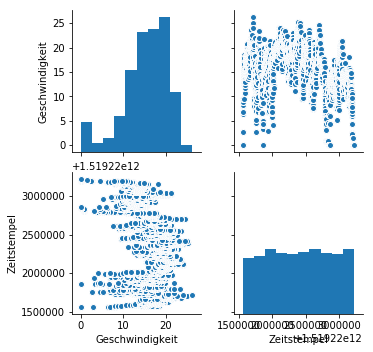

In [39]:
# pairplot mit Geschwindigkeit und Zeitstempel
sns.pairplot(featuresDf[['Geschwindigkeit','Zeitstempel']])

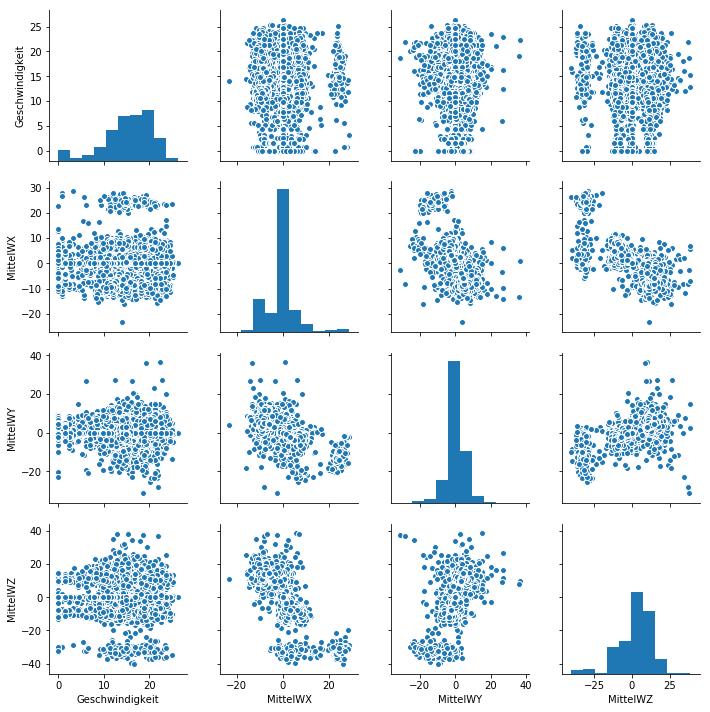

In [46]:
# Die Geschwindigkeit wird den Mittelwert der Beschleunigungssensordaten X,Y,Z gegenübergestellt.
# Hier werden auch die Mittelwerte miteinander geplottet.
sns.pairplot(featuresDf[['Geschwindigkeit','MittelWX','MittelWY','MittelWZ']])

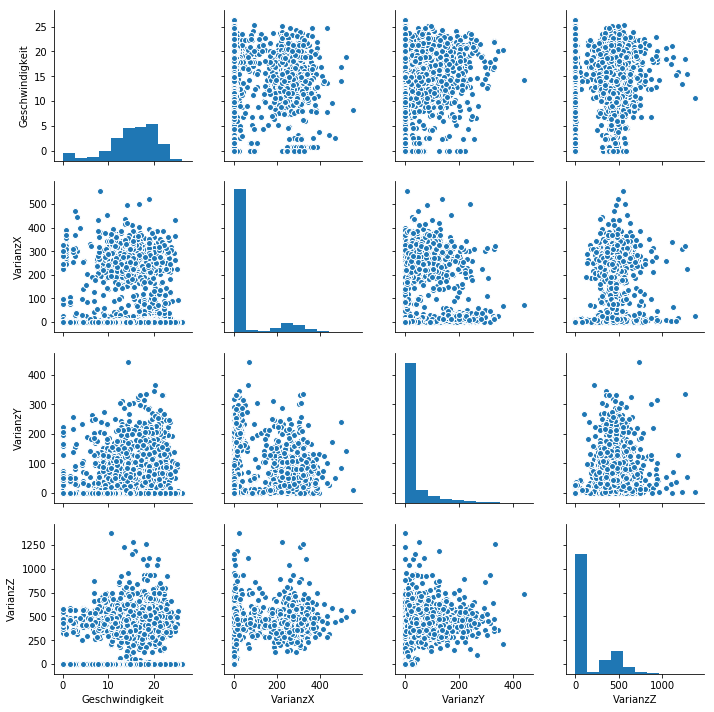

In [47]:
# Varianz der Beschleunigungsensorachsen
sns.pairplot(featuresDf[['Geschwindigkeit','VarianzX','VarianzY','VarianzZ']])

In [48]:
featuresDf['Geschwindigkeit'].min()

0.0

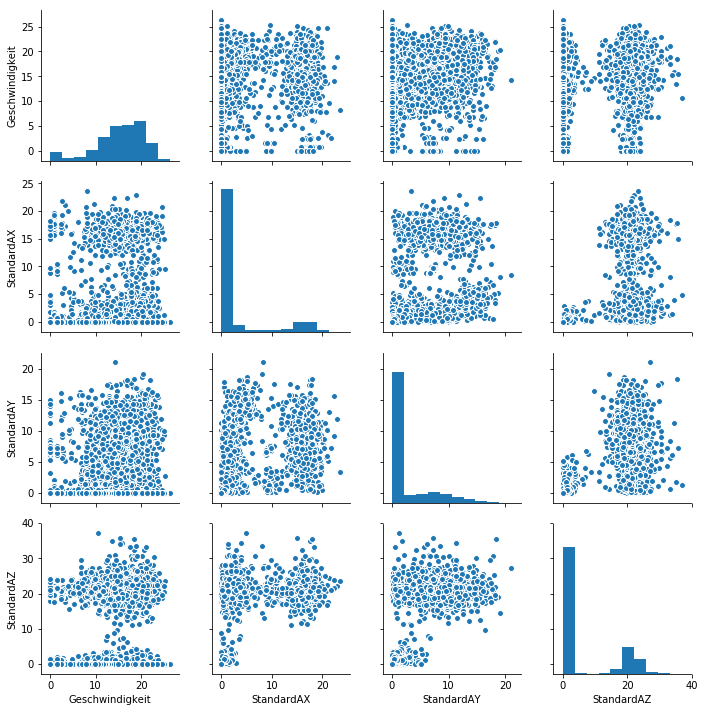

In [42]:
# Standardabweichung der Beschleunigungsensorachsen
sns.pairplot(featuresDf[['Geschwindigkeit','StandardAX','StandardAY','StandardAZ']])

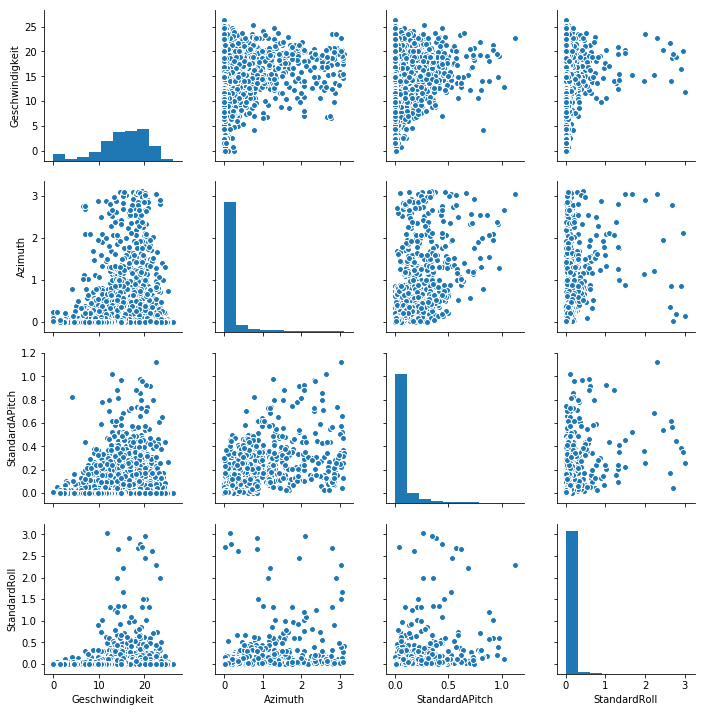

In [52]:
sns.pairplot(featuresDf[['Geschwindigkeit','Azimuth','StandardAPitch','StandardRoll']])

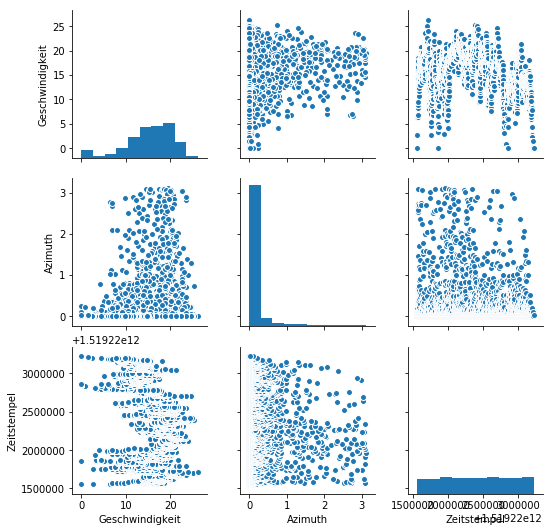

In [57]:
# Azimuth gibt die Winkeländerung in Rad an von Start der Datenerfassung bis zum Stopp dieser. 
sns.pairplot(featuresDf[['Geschwindigkeit','Azimuth','Zeitstempel']])

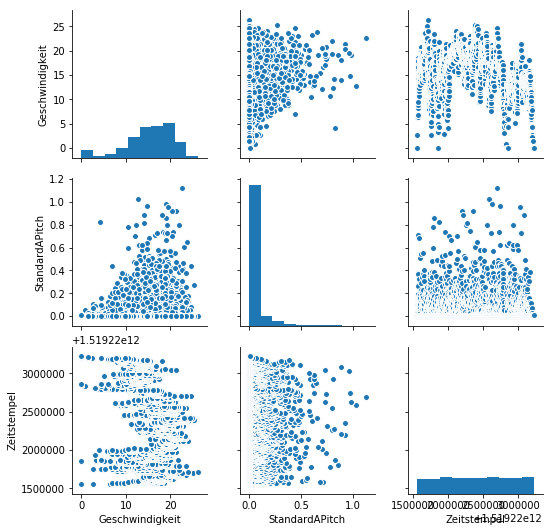

In [56]:
sns.pairplot(featuresDf[['Geschwindigkeit','StandardAPitch','Zeitstempel']])

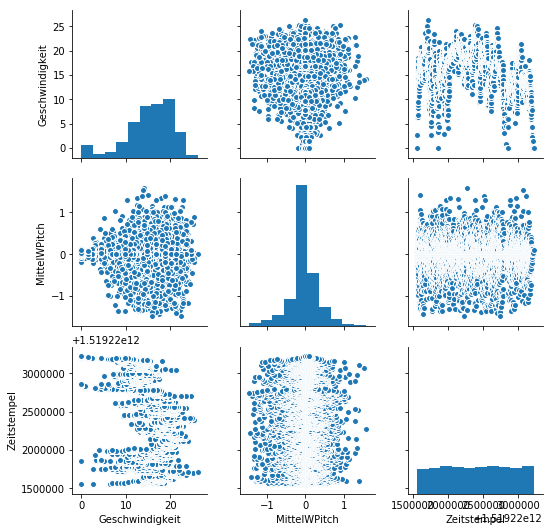

In [58]:
sns.pairplot(featuresDf[['Geschwindigkeit','MittelWPitch','Zeitstempel']])

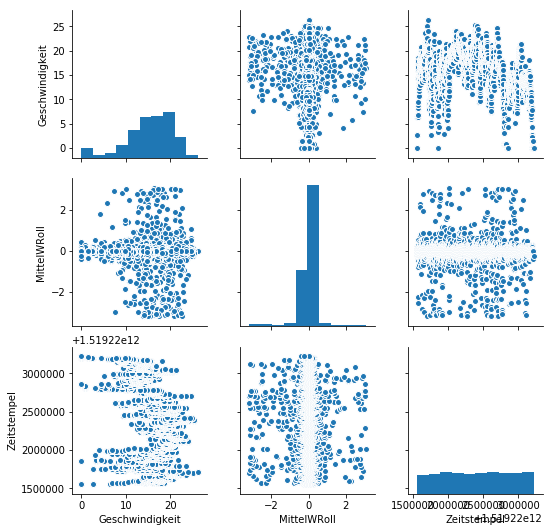

In [59]:
sns.pairplot(featuresDf[['Geschwindigkeit','MittelWRoll','Zeitstempel']])

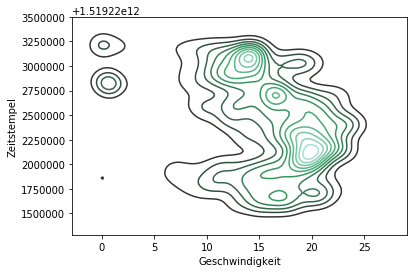

In [62]:
sns.kdeplot(featuresDf['Geschwindigkeit'],featuresDf['Zeitstempel'])

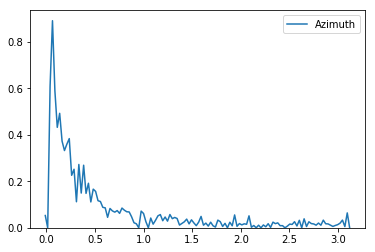

In [137]:
sns.kdeplot(featuresDf['Azimuth'])

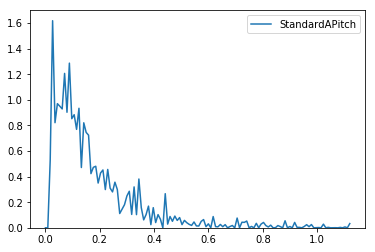

In [141]:
sns.kdeplot(featuresDf['StandardAPitch'])

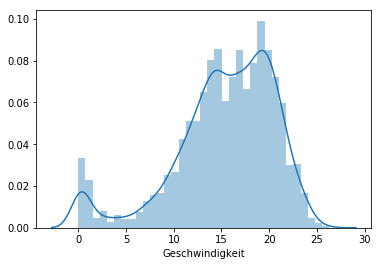

In [80]:
sns.distplot(featuresDf['Geschwindigkeit'])

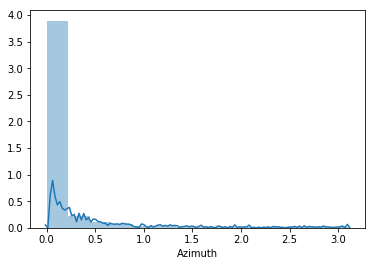

In [94]:
sns.distplot(featuresDf['Azimuth'],  bins=14)

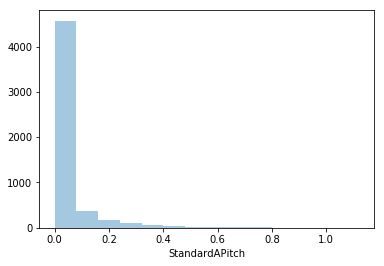

In [93]:
sns.distplot(featuresDf['StandardAPitch'], bins=14, kde=False)

In [192]:
df = featuresDf[['Breitengrad','Laengengrad']]